In [34]:
!pip install resampy

In [35]:
import librosa
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import Audio

In [36]:
audiofiles = pd.read_csv("UrbanSound8K.csv")

In [37]:
audiofiles.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [38]:
audiofiles['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [39]:
idx = list(np.where(audiofiles['class']=='gun_shot')[0])[0]

arr = np.array(audiofiles['slice_file_name'])
fold = np.array(audiofiles['fold'])
cla = np.array(audiofiles['class'])

original_audio, sample_rate = librosa.load(r'C:/Users/srija/OneDrive/Desktop/Gunshot Sound Detection/fold' + str(fold[idx]) + '/' + str(arr[idx]))

Audio(data = original_audio, rate = sample_rate)

Text(0.5, 23.52222222222222, 'Time [secs]')

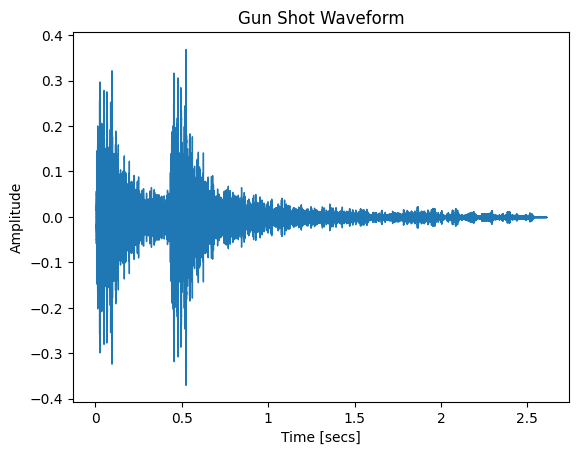

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(original_audio, sr=sample_rate, ax=ax)
ax.set(title='Gun Shot Waveform')
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time [secs]')

In [41]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(original_audio)), ref = np.max)
print(D.shape)
print(D[0])

(1025, 113)
[-24.610462 -12.005539 -20.033672 -34.107388 -18.990086 -17.43823
 -17.071049 -32.678905 -21.45955  -19.4318   -46.21174  -24.729942
 -20.638687 -22.590717 -29.827785 -16.233147 -17.228085 -55.667118
 -51.360435 -18.68585  -11.352848 -23.904137 -20.8519   -32.42077
 -13.752596 -28.641047 -24.387009 -17.115473 -24.736147 -34.316914
 -23.992018 -23.567366 -37.517612 -17.13807  -14.438372 -20.808968
 -38.68135  -32.496582 -28.375256 -20.550137 -21.63772  -26.903664
 -28.379549 -25.081032 -24.62378  -24.664707 -25.234526 -26.623083
 -26.781689 -24.22826  -22.525574 -22.235737 -24.911686 -26.12558
 -22.897469 -23.544117 -24.04003  -24.21986  -25.067965 -24.837059
 -23.701809 -21.256672 -21.096481 -20.715313 -20.428387 -24.520401
 -25.984415 -23.007875 -24.358494 -25.17133  -23.600533 -24.16642
 -26.562626 -26.707312 -23.05414  -25.004507 -29.622004 -26.006264
 -26.19376  -26.73349  -22.64078  -21.065903 -20.785038 -23.890154
 -27.188807 -24.037504 -25.179665 -30.807993 -29.80936

Text(0, 0.5, 'Decibel')

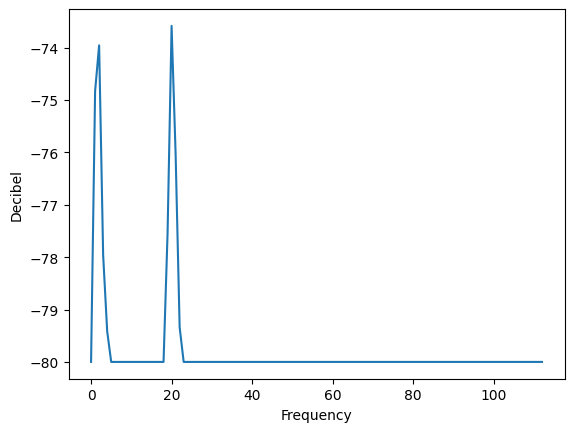

In [42]:
plt.plot(D[1000])
plt.xlabel('Frequency')
plt.ylabel('Decibel')

Text(0.5, 1.0, 'gun_shot')

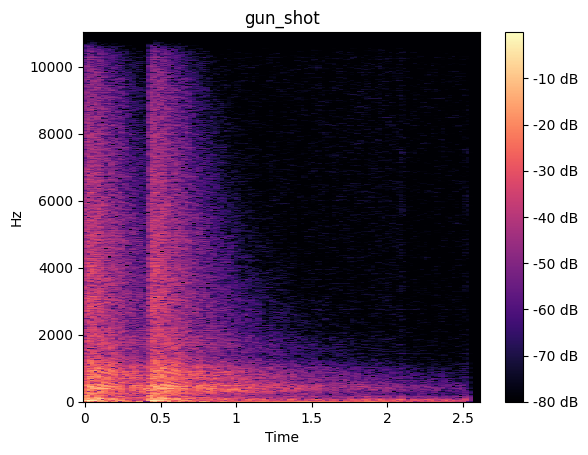

In [43]:
#spectrogram
librosa.display.specshow(D,y_axis='linear',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(cla[idx])

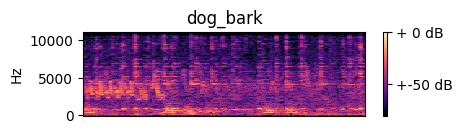

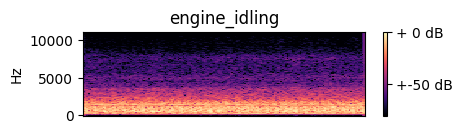

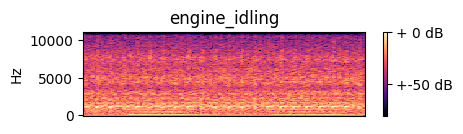

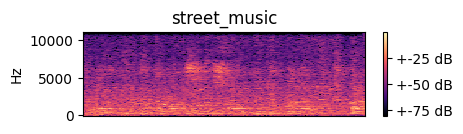

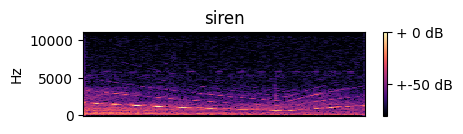

In [44]:
import librosa.display


rng = np.random.default_rng()
sample = rng.integers(0, audiofiles.shape[0], size = 5)

for i in sample:
    path = r'C:/Users/srija/OneDrive/Desktop/Gunshot Sound Detection/fold' + str(fold[i]) + '/' + str(arr[i])
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10,5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref = np.max)
    plt.subplot(4,2,1)
    librosa.display.specshow(D,y_axis='linear')
    plt.colorbar(format='+%2.0f dB')
    plt.title(cla[i])

(128, 173)
gun_shot


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

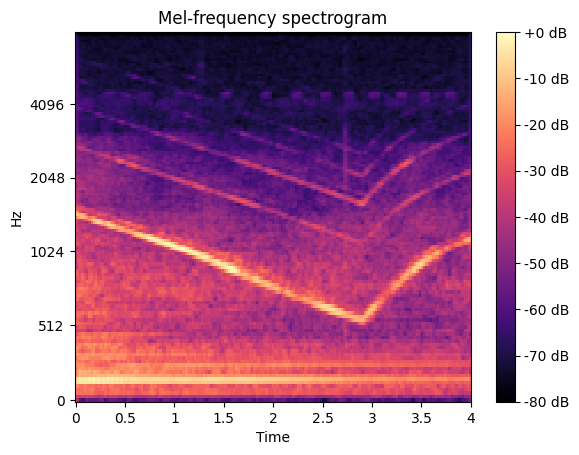

In [45]:
path = r'C:/Users/srija/OneDrive/Desktop/Gunshot Sound Detection/fold' + str(fold[i]) + '/' + str(arr[i])
data, sampling_rate = librosa.load(path)
melspec = librosa.feature.melspectrogram(y=data,sr=sampling_rate)
print(melspec.shape)
print(cla[idx])

Audio(data=data,rate = sampling_rate)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspec, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [46]:
feature = []
label = []

for i in range(len(audiofiles)):
    filename = r'C:/Users/srija/OneDrive/Desktop/Gunshot Sound Detection/fold' + str(audiofiles['fold'][i]) + '/' + str(audiofiles['slice_file_name'][i])
    X, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate).T,axis=0)
    feature.append(mels)
    label.append(audiofiles['classID'][i])

C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [47]:
feature

[array([2.32836283e-05, 2.13590669e-04, 2.84403795e-04, 5.38103399e-04,
        4.95406217e-04, 1.08277670e-03, 5.19937417e-03, 3.59481527e-03,
        3.03656352e-03, 1.16137101e-03, 6.67813816e-04, 1.55336515e-03,
        1.70633418e-03, 1.82606175e-03, 3.10368440e-03, 9.18751303e-03,
        6.59603206e-03, 4.65298956e-03, 1.57605689e-02, 3.37747149e-02,
        1.05524197e-01, 3.38305801e-01, 2.80945688e-01, 3.69583160e-01,
        1.71591544e+00, 6.54988146e+00, 2.72619867e+00, 4.23764515e+00,
        5.75704861e+00, 1.17805052e+01, 3.51552925e+01, 4.23007278e+01,
        5.75337219e+01, 1.75374851e+01, 1.13725119e+01, 1.45382452e+01,
        8.21350098e+00, 5.46533108e+00, 1.78669472e+01, 3.90507698e+01,
        1.45197735e+01, 1.98418255e+01, 1.02103891e+01, 5.77536154e+00,
        1.82384861e+00, 1.47172451e+00, 1.66592813e+00, 1.40164554e+00,
        2.94289756e+00, 7.24785328e+00, 3.97097063e+00, 1.76488304e+00,
        1.71261883e+00, 3.65596056e+00, 2.84417009e+00, 1.721998

In [48]:
feature[0].shape

(128,)

In [49]:
label[0]

3

In [50]:
temp = np.array([feature,label],dtype='object')
data = temp.transpose()


In [51]:
X_= data[:,0]
Y = data[:,1]
print(X_.shape, Y.shape)

(8732,) (8732,)


In [52]:
X = np.empty([8732,128])
for i in range(8732):
    X[i] = (X_[i])

In [53]:
Y = to_categorical(Y)

In [54]:
print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=123)
print("Number of Train Samples: ", X_train.shape[0])
print("Number of Test Samples: ", X_test.shape[0])

Number of Train Samples:  6985
Number of Test Samples:  1747


In [56]:
#Neural Network with 6 Dense Layers
model = Sequential(
    [
        Dense(1000,activation='relu',input_shape=(128,)),
        Dense(750,activation='relu'),
        Dense(500,activation='relu'),
        Dense(250,activation='relu'),
        Dense(100,activation='relu'),
        Dense(50,activation='relu'),
        Dense(10,activation='softmax'),
    ]
)
model.summary()

C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1000)           │       129,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,160 (5.38 MB)

 Trainable params: 1,411,160 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=90,batch_size=50,validation_data=[X_test,y_test])

Epoch 1/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2740 - loss: 2.3703 - val_accuracy: 0.4161 - val_loss: 1.8863
Epoch 2/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4227 - loss: 1.8020 - val_accuracy: 0.4825 - val_loss: 1.5830
Epoch 3/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5235 - loss: 1.4951 - val_accuracy: 0.5610 - val_loss: 1.4581
Epoch 4/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6083 - loss: 1.2158 - val_accuracy: 0.6045 - val_loss: 1.2736
Epoch 5/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6603 - loss: 1.0597 - val_accuracy: 0.6382 - val_loss: 1.2024
Epoch 6/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7153 - loss: 0.8727 - val_accuracy: 0.6783 - val_loss: 1.0322
Epoch 7/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7559 - loss: 0.7501 - val_accuracy: 0.6943 - val_loss: 1.0042
Epoch 8/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7725 - loss: 0.7121 - val_accuracy: 0.

In [58]:
classes = audiofiles.groupby('classID')['class'].unique()
classes

classID
0     [air_conditioner]
1            [car_horn]
2    [children_playing]
3            [dog_bark]
4            [drilling]
5       [engine_idling]
6            [gun_shot]
7          [jackhammer]
8               [siren]
9        [street_music]
Name: class, dtype: object

In [59]:
import os
def prediction_parser(filename, model, audiofiles, classes):
    feature = []
    label = []
    
    # Load audio data
    audiodata, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    
    # Extract mel spectrogram features
    mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T, axis=0)
    feature.append(mels)
    
    # Extract the base filename without the path
    base_filename = os.path.basename(filename)
    
    # Get the label
    label_value = audiofiles.loc[audiofiles['slice_file_name'] == base_filename, 'class'].values
    if len(label_value) > 0:
        label.append(label_value[0])
    else:
        print(f"Warning: No matching label found for {base_filename}")
        return None

    # Prepare data for prediction5
    temp_preds = np.array([feature, label], dtype=object)
    data_preds = temp_preds.transpose()
    X_ = data_preds[:, 0]
    X = np.array(X_[0]).reshape(1, -1)  # Ensure X has shape (1, n_features)

    # Make prediction
    classid = np.argmax(model.predict(X))
    
    print('Class predicted:', classes[classid][0])
    print('Actual:', label[0])
    
    return Audio(data=audiodata, rate=sample_rate)

In [60]:
prediction_parser(r'C:\Users\srija\OneDrive\Desktop\Gunshot Sound Detection\fold4\344-3-1-0.wav', model, audiofiles, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Class predicted: dog_bark
Actual: dog_bark


In [61]:
prediction_parser('fold1/7061-6-0-0.wav', model, audiofiles, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Class predicted: gun_shot
Actual: gun_shot


In [62]:
#make pickle file for our model
import pickle
pickle.dump(model, open("model.pkl" , "wb"))

model = pickle.load(open("model.pkl", "rb"))